In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
matplotlib.style.use('ggplot')

In [2]:
#import dataset
clt_climate_df = pd.read_csv("Data_Set.csv", low_memory=False)

In [3]:
new_clt_climate_df = clt_climate_df.loc[:, ['From Date','CO','NO2','Ozone', 'PM10', 'PM2.5','SO2']]
#new_clt_climate_df.tail()

In [4]:
#making date as index
new_clt_climate_df['From Date'] = pd.to_datetime(new_clt_climate_df['From Date'])
new_clt_climate_df.set_index('From Date', inplace=True)
new_clt_climate_df.index = new_clt_climate_df.index.normalize()
#new_clt_climate_df.head()

In [5]:
#Drop rows with none values and update it in new dataset
new_clt_climate_df = new_clt_climate_df.dropna()
new_clt_climate_df.to_csv('Aqi_dataset.csv')
#new_clt_climate_df.tail()

In [6]:
#add dummy variable and AQI column and update it in new dataset
maxaqi=new_clt_climate_df.max(axis=1)
new_clt_climate_df.insert(6,'AQI',maxaqi)
new_clt_climate_df.insert(0,'Dummy',1)
new_clt_climate_df.to_csv('Aqi_dataset.csv')
#new_clt_climate_df.tail()

In [7]:
#define features and predictions
y=new_clt_climate_df.AQI
x=new_clt_climate_df.drop('AQI',axis=1)

In [8]:
#divide data into train and test
#splits in 80:20 ratio sequencially
index = int(0.8 * len(x))
x_train, x_test = x[:index], x[index:]
y_train, y_test = y[:index], y[index:]
index

1231

In [9]:
#function to calculate theta for MLE
def max_lik_estimate(X, y):
    N, D = X.shape
    X_t = X.transpose()
    p = np.dot(X_t,X)
    i = np.linalg.inv(p)
    q = np.dot(i,X_t)
    theta_ml = np.dot(q,y) ## <-- Hint1: Implement the expression of ML estimator.
    return theta_ml

In [10]:
#function to predict
def predict_with_estimate(Xtest, theta):
# Xtest: K x D matrix of test inputs
# theta: D x 1 vector of parameters
# returns: prediction of f(Xtest); K x 1 vector
    prediction = np.dot(Xtest,theta) ## <-- Hint2: Write the expression to predict
    return prediction

In [11]:
#calculate theta on train values
theta_ml_train = max_lik_estimate(x_train,y_train)
theta_ml_train

array([5.76866412e-01, 8.35512749e-02, 3.87248817e-04, 1.74735924e-02,
       9.80553634e-01, 2.31079020e-02, 4.96036685e-02])

In [12]:
#predict y for train values for finding rmse of train data
ml_prediction_train = predict_with_estimate(x_train, theta_ml_train)
#len(ml_prediction_train)

In [13]:
#predict y for test values
ml_prediction_test = predict_with_estimate(x_test, theta_ml_train)
#len(ml_prediction_test)

In [14]:
def RMSE(Y_true,Y_pred):
#rmse = -1 ## <-- Hint 7: Given that you have y and ypred, find the RMSE
    mse=np.square(np.subtract(Y_true,Y_pred)).mean()
    rmse=np.sqrt(mse)
    return rmse

In [15]:
#calculate root mean square error for test data
rmse_test=RMSE(y_test,ml_prediction_test)
rmse_test

1.3424335623885508

In [16]:
#calculate root mean square error for train data
rmse_train=RMSE(y_train,ml_prediction_train)
rmse_train

5.410094569592849

In [17]:
#making array of x,y for graph
Cols = pd.read_csv('Aqi_dataset.csv',usecols = ['From Date','AQI'])
Datecol = Cols['From Date'].values
AQIcol = Cols['AQI'].values

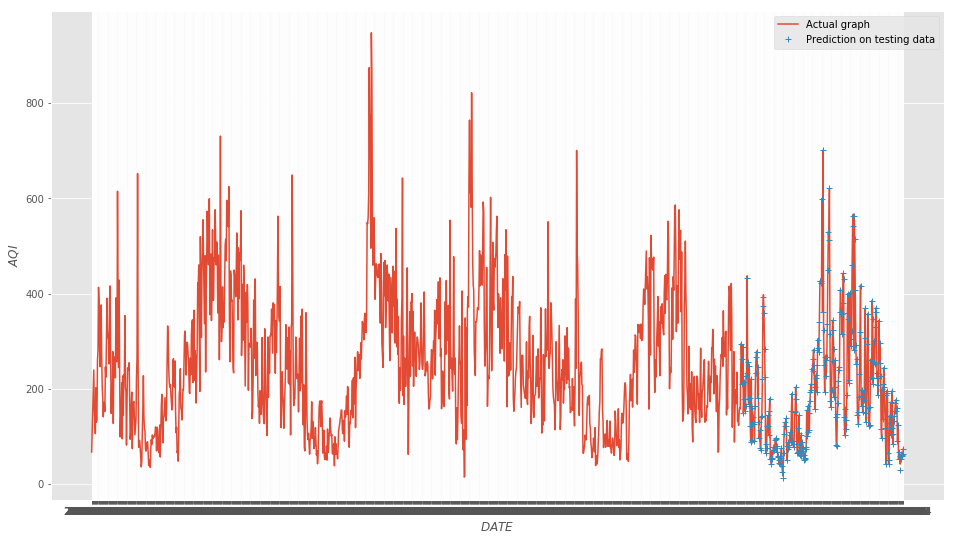

In [18]:
plt.figure(figsize=(16,9))

#actual graph
plt.plot(Datecol,AQIcol)

#graph for prediction on train data
#plt.plot(Datecol[:index],ml_prediction_train)

#graph for prediction on test data
plt.plot(Datecol[index:],ml_prediction_test,'+')
plt.xlabel("$DATE$")
plt.ylabel("$AQI$");
plt.legend(["Actual graph", "Prediction on testing data"]);